# Initialisation

## Import libraries and modules

In [1]:
import pandas as pd
import numpy as np

from neural_network import Neural_Network
from data_visualisation import *

%matplotlib inline

## Import data

In [2]:
data_set = pd.read_excel("../data/data-1000.xlsx")
data_set.describe()


,X1,X2,Y1,Y2,Y3,Y4,Y5,Y6,Y7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,0.494500,0.503874,3.433374,0.497000,32.899558,0.776799,1.011638e+00,6.913241,0.352000
std,0.290775,0.289215,3.013086,0.500241,29.891080,2.314363,7.194533e-01,1.395570,0.477833
min,0.000901,0.002165,-2.868126,0.000000,0.000081,-2.476609,4.532358e-07,5.000514,0.000000
25%,0.232750,0.250384,0.930232,0.000000,5.417267,-0.717698,2.887074e-01,5.744422,0.000000
50%,0.499786,0.508934,3.453904,0.000000,24.978599,-0.005678,1.001346e+00,6.627194,0.000000
75%,0.747059,0.740819,5.819886,1.000000,55.809771,1.705797,1.736948e+00,7.997545,1.000000
max,0.999476,0.999794,9.768018,1.000000,99.895286,9.427286,1.999998e+00,9.978397,1.000000


## Extracting the useful data

In [3]:
def extract_features(data_set, *argv):
    features_names = []
    for feature in argv:
        features_names.append(feature)
        
    features_df = data_set[features_names]
    features_matrix = features_df.to_numpy()
    features_matrix = np.transpose(features_matrix)
    
    total_set_size = features_matrix.shape[1]
    train_set_size = int(0.8*total_set_size)
    
    features_train = features_matrix[:, :train_set_size]
    features_test = features_matrix[:, train_set_size:]
    
    return features_train, features_test

In [4]:
X1_train, X1_test = extract_features(data_set, "X1")
X2_train, X2_test = extract_features(data_set, "X2")
X1X2_train, X1X2_test = extract_features(data_set, "X1", "X2")

Y1_train, Y1_test = extract_features(data_set, "Y1")
Y2_train, Y2_test = extract_features(data_set, "Y2")
Y3_train, Y3_test = extract_features(data_set, "Y3")
Y4_train, Y4_test = extract_features(data_set, "Y4")
Y5_train, Y5_test = extract_features(data_set, "Y5")
Y6_train, Y6_test = extract_features(data_set, "Y6")
Y7_train, Y7_test = extract_features(data_set, "Y7")

In [5]:
print(X1X2_train.shape)

(2, 800)


# Test 0: Identity function

## Creating the neural network

In [6]:
neurons_per_layer_00 = [1, 1]
lr_00 = 0.005

nn_00 = Neural_Network(neurons_per_layer_00, lr_00)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


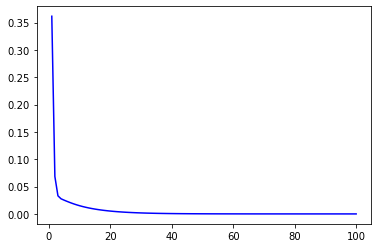

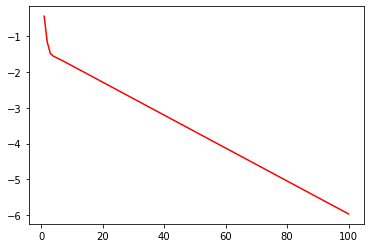

In [7]:
cost_list_00 = nn_00.fit(X1_train, X1_train, X1_test, X1_test, 100, batch_size=10)

print_cost(cost_list_00)
print_cost_log(cost_list_00)

## Show result

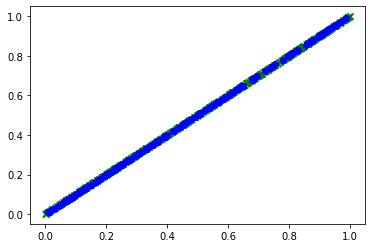

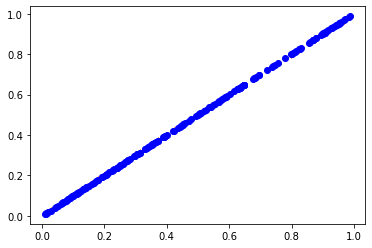

In [8]:
Y_test_pred_00 = nn_00.predict(X1_test)

print_regression(X1_train, X1_train, X1_test, X1_test, Y_test_pred_00)

## Indivual tests

In [9]:
x_00 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5]])
y_p_00 = nn_00.predict(x_00)

print(y_p_00)

[[0.09847269 0.19881747 0.29916225 0.39950703 0.49985181]]


# Test 1: $10X_1 - 3X_2$

## Creating the neural network

In [63]:
neurons_per_layer_01 = [2, 2, 1]
lr_01 = 0.001

nn_01 = Neural_Network(neurons_per_layer_01, lr_01)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


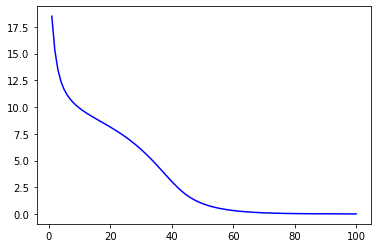

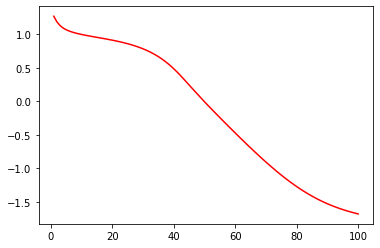

In [64]:
cost_list_01 = nn_01.fit(X1X2_train, Y1_train, X1X2_test, Y1_test, 100, batch_size=10)

print_cost(cost_list_01)
print_cost_log(cost_list_01)

In [65]:
Y_test_pred_01 = nn_01.predict(X1X2_test)

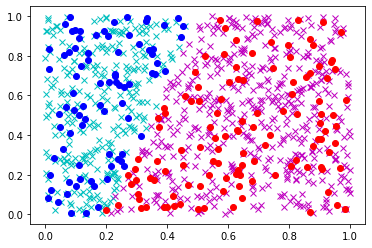

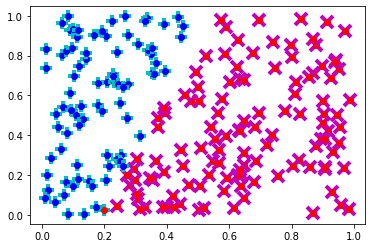

In [66]:
print_classification(X1X2_train, Y1_train, X1X2_test, Y1_test, Y_test_pred_01, 2)

## Manual tests

In [67]:
x_01 = np.array([[0.1, 0.4, 0.5, 0.8], 
              [0.2, 0.3, 0.6, 0.7]])
y_p_01 = nn_01.predict(x_01)
y_01 = 10*x_01[0] - 3*x_01[1]

for y in y_p_01[0]:
    print(f"{y: .2f}", end = " ")
print()
for y in y_01:
    print(f"{y: .2f}", end = " ")

 0.47  3.14  3.19  5.86 
 0.40  3.10  3.20  5.90 

# Test 2: $X_1 \geq X_2$

## Creating the neural network

In [87]:
neurons_per_layer_02 = [2, 10, 1]
lr_02 = 0.01

nn_02 = Neural_Network(neurons_per_layer_02, lr_02)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


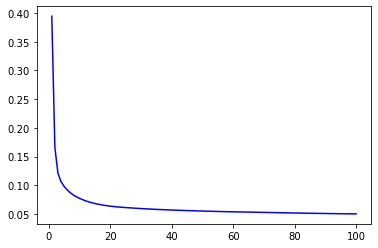

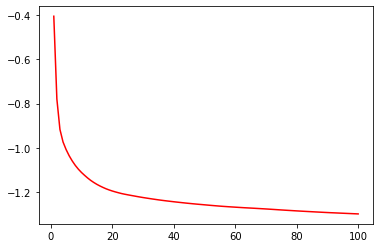

In [88]:
cost_list_02 = nn_02.fit(X1X2_train, Y2_train, X1X2_test, Y2_test, 100, batch_size=10)

print_cost(cost_list_02)
print_cost_log(cost_list_02)

In [89]:
Y_test_pred_02 = nn_02.predict(X1X2_test)

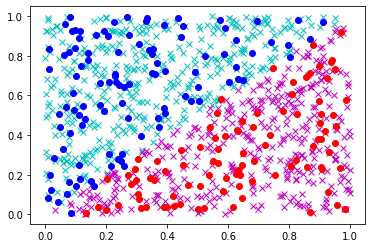

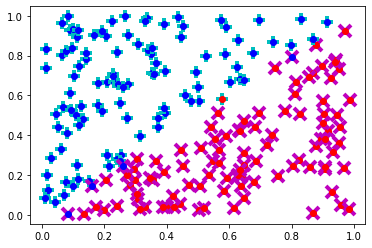

In [90]:
print_classification(X1X2_train, Y2_train, X1X2_test, Y2_test, Y_test_pred_02, 0.5)

## Manual tests

In [91]:
x_02 = np.array([[0.1, 0.4, 0.5, 0.8, 0.505, 0.9, 0.1], 
                 [0.2, 0.3, 0.6, 0.7, 0.5, 0.1, 0.9]])
y_p_02 = nn_02.predict(x_02)
y_02 = x_02[0] >= x_02[1]

for p in y_p_02[0]:
    print(f"{p: .2f}", end=" ")
print()
print((y_p_02 >= 0.5)[0])
print(y_02)

 0.25  0.68  0.32  0.69  0.53  0.90 -0.02 
[False  True False  True  True  True False]
[False  True False  True  True  True False]


# Test 3: $100*(X_1)^2$

## Creating the neural network

In [20]:
neurons_per_layer_03 = [1, 10, 1]
lr_03 = 0.005

nn_03 = Neural_Network(neurons_per_layer_03, lr_03)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


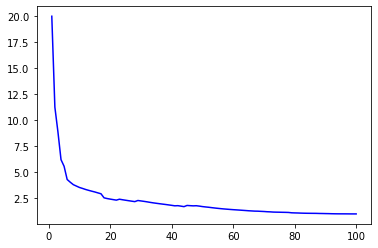

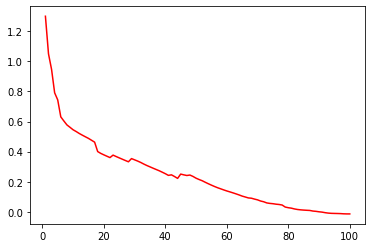

In [21]:
cost_list_03 = nn_03.fit(X1_train, Y3_train, X1_test, Y3_test, 100, batch_size=10)

print_cost(cost_list_03)
print_cost_log(cost_list_03)

## Show results

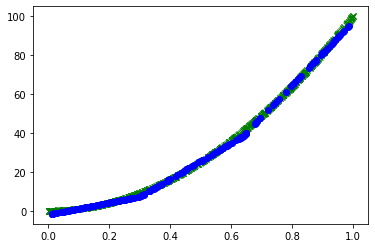

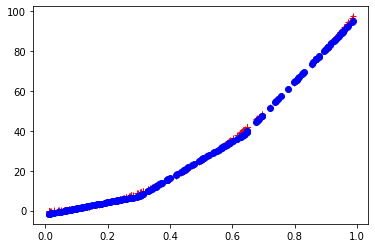

In [22]:
Y_test_pred_03 = nn_03.predict(X1_test)

print_regression(X1_train, Y3_train, X1_test, Y3_test, Y_test_pred_03)

## Manual tests

In [23]:
x_03 = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])
y_p_03 = nn_03.predict(x_03)
y_03 = 100*x_03*x_03


for u, v in zip(y_p_03[0], y_03[0]):
    print(f"{u: .2f} -- {int(v)}")

-1.99 -- 0
 1.06 -- 1
 4.11 -- 4
 7.16 -- 9
 16.28 -- 16
 25.45 -- 25
 34.62 -- 36
 48.21 -- 49
 64.53 -- 64
 80.84 -- 81
 97.16 -- 100


# Test 4: $10*X_1(X_1 - X_2)$

## Creation of the neural network

In [94]:
neurons_per_layer_04 = [2, 10, 1]
lr_04 = 0.01

nn_04 = Neural_Network(neurons_per_layer_04, lr_04)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


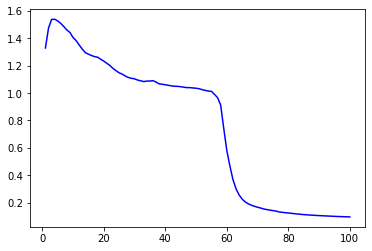

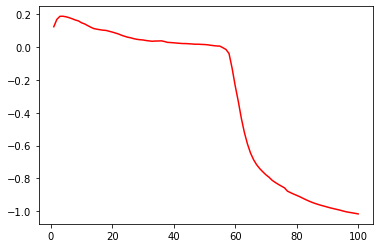

In [95]:
cost_list_04 = nn_04.fit(X1X2_train, Y4_train, X1X2_test, Y4_test, 100, batch_size=10)

print_cost(cost_list_04)
print_cost_log(cost_list_04)

In [96]:
print(cost_list_04[-1])
print(np.log10(cost_list_04[-1]))

0.09650779543870922
-1.0154376050056495


## Show results

In [97]:
Y_test_pred_04 = nn_04.predict(X1X2_test)

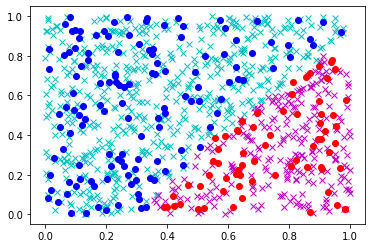

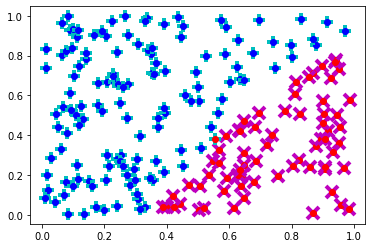

In [98]:
print_classification(X1X2_train, Y4_train, X1X2_test, Y4_test, Y_test_pred_04, 1)

## Manual tests

In [99]:
x_04 = np.array([[0,   0.3, 0.4, 0.7, 0.8],
                [0.1, 0.2, 0.5, 0.6, 0.9]])

y_p_04 = nn_04.predict(x_04)
y_04 = 10*x_04[0]*x_04[0] - 10*x_04[0]*x_04[1]

for u, v in zip(y_p_04[0], y_04):
    print(f"{u: .3f} -- {v: .3f}")

 0.373 --  0.000
 0.025 --  0.300
-0.531 -- -0.400
 1.019 --  0.700
-0.616 -- -0.800


# Test 5: $1 + \sin(2\pi X_1)$

## Creation of the neural network

In [48]:
neurons_per_layer_05 = [1, 10, 1]
lr_05 = 0.01
nn_05 = Neural_Network(neurons_per_layer_05, lr_05)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


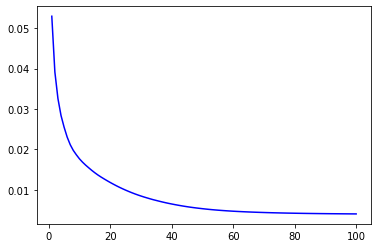

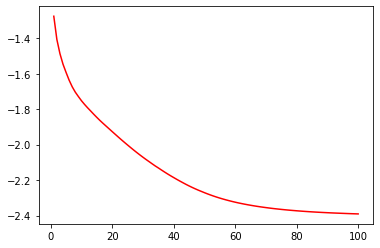

In [49]:
cost_list_05 = nn_05.fit(X1_train, Y5_train, X1_test, Y5_test, 100, batch_size=10)

print_cost(cost_list_05)
print_cost_log(cost_list_05)

In [50]:
import numpy as np
#[1, 4, 4, 4, 4, 1], 
# lr: 0.01, 
#epoch: 20
#batch: 1
print(cost_list_05[-1]) #0.032
print(np.log10(cost_list_05[-1])) #-1.5

0.004070728954162638
-2.3903278137665973


## Show results

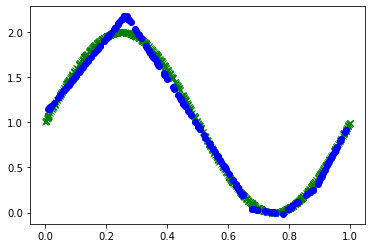

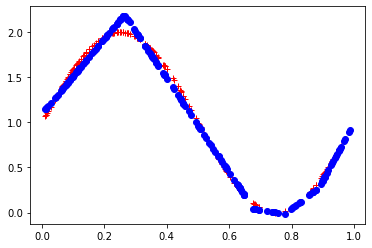

In [51]:
Y_test_pred_05 = nn_05.predict(X1_test)

print_regression(X1_train, Y5_train, X1_test, Y5_test, Y_test_pred_05)

## Manual tests

In [33]:
import numpy as np

x_05 = np.array([[i/12 for i in range(12)]])
y_p_05 = nn_05.predict(x_05)
y_05 = 1 + np.sin(2*np.pi*x_05)


for u, v in zip(y_p_05[0], y_05[0]):
    print(f"{u: .2f} -- {v: .2f}")

 0.57 --  1.00
 1.49 --  1.50
 1.75 --  1.87
 1.55 --  2.00
 1.35 --  1.87
 1.15 --  1.50
 0.95 --  1.00
 0.75 --  0.50
 0.55 --  0.13
 0.35 --  0.00
 0.16 --  0.13
-0.04 --  0.50


# Test 6: $\frac{10}{1 + X_2}$

## Creation of the neural network

In [34]:
neurons_per_layer_06 = [1, 10, 1]
lr_06 = 0.002

nn_06 = Neural_Network(neurons_per_layer_06, lr_06)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


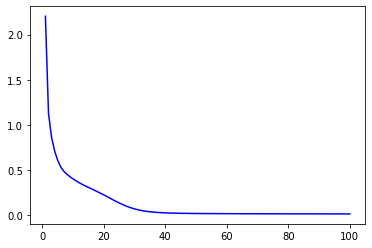

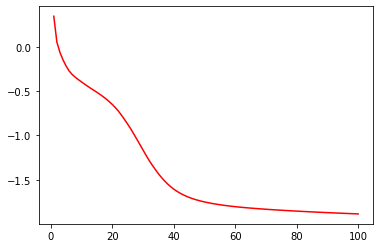

In [35]:
cost_list_06 = nn_06.fit(X2_train, Y6_train, X2_test, Y6_test, 100, batch_size=10)

print_cost(cost_list_06)
print_cost_log(cost_list_06)


## Show results

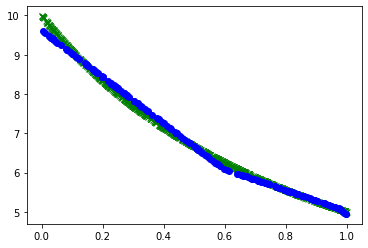

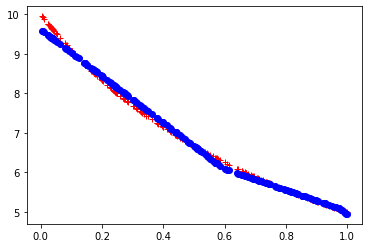

In [36]:
Y_test_pred_06 = nn_06.predict(X2_test)

print_regression(X2_train, Y6_train, X2_test, Y6_test, Y_test_pred_06)

## Manual tests

# Test 7: $\left(X_1 - \frac{1}{2}\right)^2 + \left(X_2 - \frac{1}{2}\right)^2 \leq \frac{1}{9}$

## Creation of the neural network

In [106]:
neurons_per_layer_07 = [2, 10, 1]
lr_07 = 0.01

nn_07 = Neural_Network(neurons_per_layer_07, lr_07)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


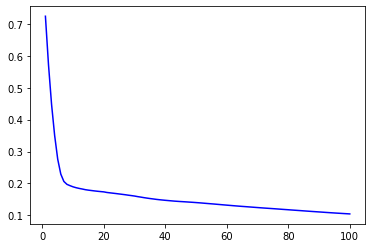

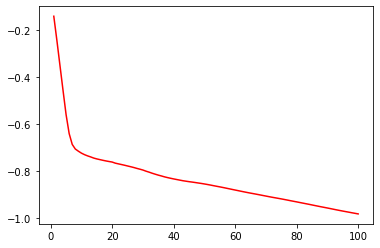

In [107]:
cost_list_07 = nn_07.fit(X1X2_train, Y7_train, X1X2_test, Y7_test, 100, batch_size=10)

print_cost(cost_list_07)
print_cost_log(cost_list_07)


## Show results

In [108]:
Y_test_pred_07 = nn_07.predict(X1X2_test)

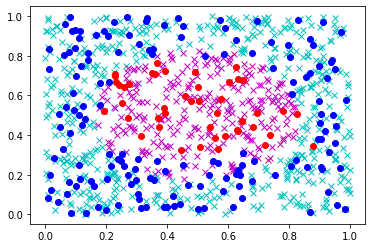

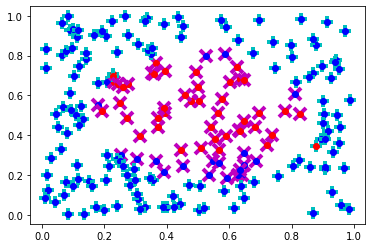

In [109]:
print_classification(X1X2_train, Y7_train, X1X2_test, Y7_test, Y_test_pred_07, 0.5)

## Manual tests

In [110]:
x_07 = np.array([[0,   0.3, 0.4, 0.7, 0.8],
                [0.1, 0.2, 0.5, 0.6, 0.9]])

y_p_07 = nn_07.predict(x_07)
y_07 = (x_07[0]-1/2)*(x_07[0]-1/2) + (x_07[1]-1/2)*(x_07[1]-1/2) <= 1/9

for y in y_p_07[0]:
    print(f"{y: .2f}", end = " ")
print()
for y in y_p_07[0]:
    print(f"{y >= 0.5}", end = " ")
print()
for y in y_07:
    print(f"{y}", end = " ")

 0.11  0.24  0.93  0.73  0.14 
False False True True False 
False False True True False 

In [42]:
#neurons_per_layer_03 = [1, 2, 2, 1]
#lr_03 = 0.0005

#nn_03 = Neural_Network(neurons_per_layer_03, lr_03)


#cost_list_03 = nn_03.fit(X1_train, Y3_train, X1_test, Y3_test, 10)

#print_cost(cost_list_03)
#print_cost_log(cost_list_03)


#Y_test_pred_03 = nn_03.predict(X1_test)

#print_regression(X1_train, Y3_train, X1_test, Y3_test, Y_test_pred_03, nn_03)


#x_03 = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])
#y_p_03 = nn_03.predict(x_03)
#y_03 = 100*x_03*x_03


#for u, v in zip(y_p_03[0], y_03[0]):
#    print(f"{u: .2f} -- {int(v)}")